<a href="https://colab.research.google.com/github/ad709kr/capstone_projects-EDA-on-Telecom-churn-analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Almabetter/capstone_project-1/Telecom Churn.csv'

In [ ]:
data = pd.read_csv(file_path)
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
print("data has",data.shape[0]," rows and ", data.shape[1], "columns")
print("-"*50)
print(data.info())

data has 3333  rows and  20 columns
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total 

Churn column is the target variable which of boolean type. Apart from that, 3 object type features, 8 float and 8 int type features are present in the dataset.

lets checks the null values in datasets.

In [ ]:
data.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

there is no null values in the dataset.

1) Lets find out the churn rate of the company.

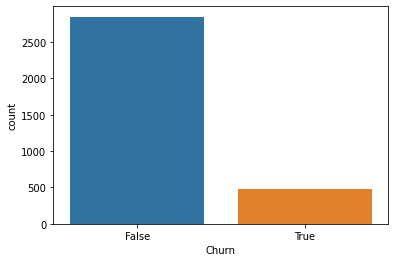

In [ ]:
sns.countplot(data=data,x='Churn')

In [ ]:
comp_churn_rate = data['Churn'].value_counts()[1]*100/data.shape[0]
print("The churn for the company is :", comp_churn_rate,"%")

The churn for the company is : 14.491449144914492 %


Churn rate is defined as the ratio of total customer lost during the period to the total customer at the beginning.

2)lets find out the relationship between the catogrical features and the churn rate. Identify which catogory has maximum churn value?

In [ ]:
print(data['State'].unique())
print('Total number of unique states are',data['State'].unique().shape[0])
print("*"*50)
print(data['International plan'].unique())
print("*"*50)
print(data['Voice mail plan'].unique())
print("*"*50)
print(data['Area code'].unique())

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Total number of unique states are 51
**************************************************
['No' 'Yes']
**************************************************
['Yes' 'No']
**************************************************
[415 408 510]


All 3 object features are of catogorical type
<br> - States have 51 unique states name
<br> - International plan - catogorical feature of 2 catogory, either customer has activated international plan or not.
<br> - Voice mail plan - catogorical feature of 2 catogory, either customer has activated Voice maill plan or not 
<br> - Area code has total 3 catogory

In [ ]:
def histogram_for_pop(df,hue=None):
  plt.style.use("fivethirtyeight")
  plt.figure(figsize= (20,22))
  color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
  for i,col in enumerate(df.columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(8,3, i+1)
    sns.countplot(data=df,x=df[col], hue= hue,color = rand_col, fill = rand_col)
    plt.title(col, color = 'black')
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout()
def count_cat_feature(df,col):
  df1 = df[col].value_counts().reset_index()
  return df1.rename(columns={df1.columns[0]:col,df1.columns[1]:"count"})


   Area code  count
0        415   1655
1        510    840
2        408    838
--------------------------------------------------
  International plan  count
0                 No   3010
1                Yes    323
--------------------------------------------------
  Voice mail plan  count
0              No   2411
1             Yes    922


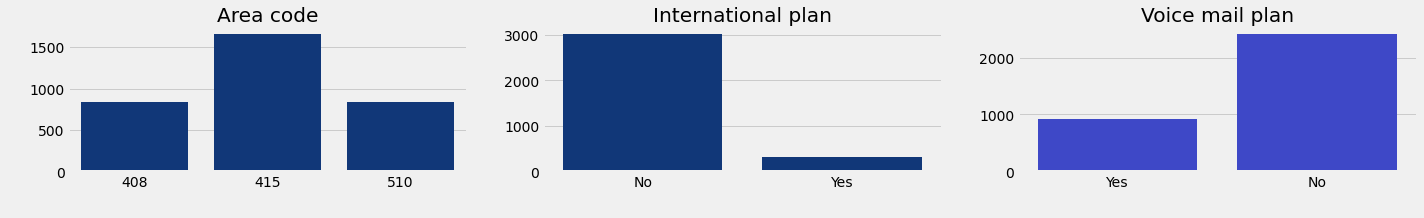

In [ ]:
# For total customer
df_cat = data[['Area code', 'International plan','Voice mail plan']]
histogram_for_pop(df_cat)

Area_code_df = count_cat_feature(df_cat,col="Area code")
int_plan_df = count_cat_feature(df_cat,col="International plan")
v_m_p_df = count_cat_feature(df_cat,col="Voice mail plan")

print(Area_code_df)
print("-"*50)
print(int_plan_df)
print("-"*50)
print(v_m_p_df)



##print("-"*100)
##print(data["International plan"].value_counts())
#print("-"*100)
#print(data["Voice mail plan"].value_counts())


The above analysis is done for all the customer present.

Lets try and identify the churn values for different catogorical feature.

   Area code  count
0        415    236
1        510    125
2        408    122
--------------------------------------------------
  International plan  count
0                 No    346
1                Yes    137
--------------------------------------------------
  Voice mail plan  count
0              No    403
1             Yes     80


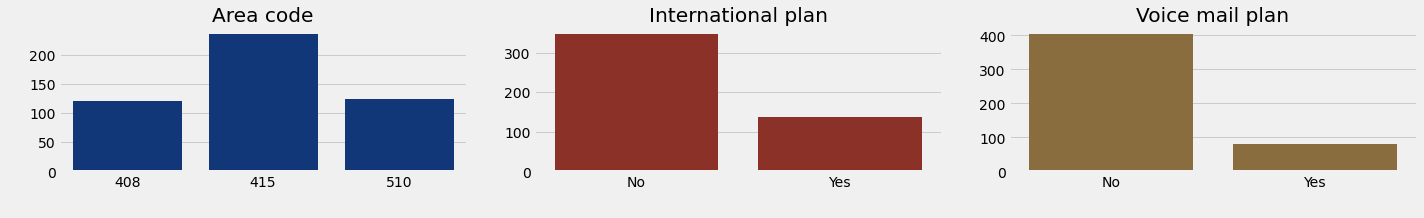

In [ ]:
# for whom the churn value is true
data_churn = data[data['Churn']==True]
data_churn_count = data_churn[['Area code', 'International plan','Voice mail plan']]

histogram_for_pop(data_churn_count)

Area_code_churn = count_cat_feature(data_churn_count,col="Area code")
int_plan_churn = count_cat_feature(data_churn_count,col="International plan")
v_m_p_churn = count_cat_feature(data_churn_count,col="Voice mail plan")

print(Area_code_churn)
print("-"*50)
print(int_plan_churn)
print("-"*50)
print(v_m_p_churn)


In [ ]:
# lets calculate churn rate for each cotegory Churn_rate = churn value / total count
def churn_rate(total_df,churn_df):
  return churn_df['count']*100/total_df['count']

Area_code_churn['churn rate'] = churn_rate(Area_code_df,Area_code_churn)
int_plan_churn['churn rate'] = churn_rate(int_plan_df,int_plan_churn)
v_m_p_churn['churn rate'] = churn_rate(v_m_p_df,v_m_p_churn)

In [ ]:
print(Area_code_churn)
print("-"*50)
print(int_plan_churn)
print("-"*50)
print(v_m_p_churn)

   Area code  count  churn rate
0        415    236   14.259819
1        510    125   14.880952
2        408    122   14.558473
--------------------------------------------------
  International plan  count  churn rate
0                 No    346   11.495017
1                Yes    137   42.414861
--------------------------------------------------
  Voice mail plan  count  churn rate
0              No    403   16.715056
1             Yes     80    8.676790


In [ ]:
def bar_for_churn(df,col1,col2,col3,col4 = comp_churn_rate):
  plt.style.use("fivethirtyeight")
  plt.figure(figsize= (5,3))
  color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
  rand_col = color_[random.sample(range(6), 1)[0]]
  plt.bar(col1,df[col2],tick_label=df[col3], color = rand_col, fill = rand_col)
  plt.axhline(col4,color = 'y', linestyle = '--',linewidth = 2,label='company churn rate')
  plt.title(col3, color = 'black')
  plt.ylabel(" ")
  plt.xlabel(" ")
  plt.tight_layout()
  plt.show()

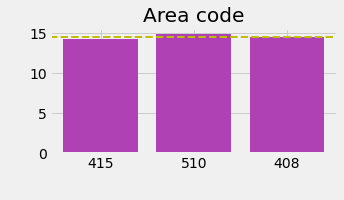

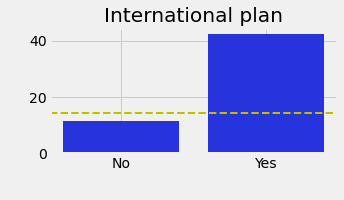

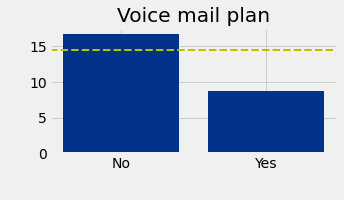

In [ ]:
left_coordinates=[1,2,3]
bar_for_churn(Area_code_churn,left_coordinates,'churn rate','Area code')
left_coordinates1=[1,2]
bar_for_churn(int_plan_churn,left_coordinates1,'churn rate','International plan')

bar_for_churn(v_m_p_churn,left_coordinates1,'churn rate','Voice mail plan')

since the states value having the total 51 unique values, Lets plot them seperately and calculate the maximum chrun rate

In [ ]:
# for state catogory
state_pop = count_cat_feature(data,col="State")
state_churn = count_cat_feature(data_churn,col="State")
state_churn['churn rate'] = churn_rate(state_pop,state_churn)

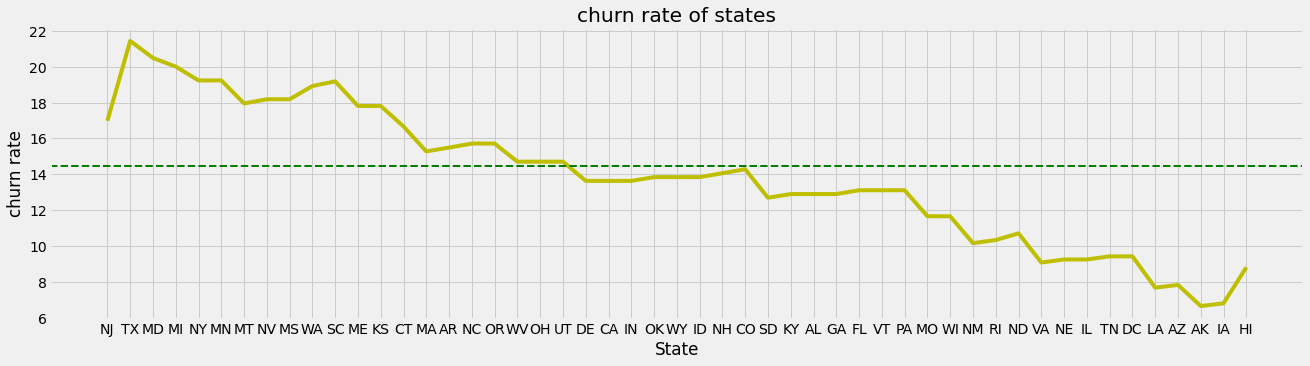

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(state_churn['State'],state_churn['churn rate'],"y")
plt.axhline(comp_churn_rate,color = 'g', linestyle = '--',linewidth = 2,label='company churn rate')
plt.xlabel("State")
plt.ylabel("churn rate")
plt.title("churn rate of states")
plt.show()

In [ ]:
print("maximum person belongs to state:",state_pop['State'][state_pop['count']== max(state_pop['count'])])
print("-"*50)
print("maximum person churns belongs to state:",state_churn['State'][state_pop['count']== max(state_pop['count'])])
print("-"*50)
print("maximum churn rate state:",state_churn['State'][state_churn['churn rate']== max(state_churn['churn rate'])])

maximum person belongs to state: 0    WV
Name: State, dtype: object
--------------------------------------------------
maximum person churns belongs to state: 0    NJ
Name: State, dtype: object
--------------------------------------------------
maximum churn rate state: 1    TX
Name: State, dtype: object


**Observation from cotegorical features**
<br> -The maximum value of churn is observed from Area code 415 and the minimum value from Area code 408.
<br> -The 346 person does not have international plans activated and 137 people have taken the international plans out of the total people who churn.
<br> -The voice mail plan subscription was not taken by 403 and taken by 80 person.
<br> - The maximum churn rate was observed for the customer who have taken the international plan subscriptions approximately 42.41%.
<br> - maximum person belongs to state WV, maximum churn value is from NJ but maximum churn rate is from TX.

**question 3)** what catogry is having churn rate is higher than the companies average churn rate?


In [ ]:
print("Area code having the higher churn rate than the company average churn rate")
print(Area_code_churn[['Area code','churn rate']][Area_code_churn['churn rate'] >= comp_churn_rate])

Area code having the higher churn rate than the company average churn rate
   Area code  churn rate
1        510   14.880952
2        408   14.558473


In [ ]:
print("International plan having the higher churn rate than the company average churn rate")
print(int_plan_churn[['International plan','churn rate']][int_plan_churn['churn rate'] >= comp_churn_rate])

International plan having the higher churn rate than the company average churn rate
  International plan  churn rate
1                Yes   42.414861


In [ ]:
print("Voice mail plan having the higher churn rate than the company average churn rate")
print(v_m_p_churn[['Voice mail plan','churn rate']][v_m_p_churn['churn rate'] >= comp_churn_rate])

Voice mail plan having the higher churn rate than the company average churn rate
  Voice mail plan  churn rate
0              No   16.715056


In [ ]:
print("States having churn rate higher than the company churn rate")
print(state_churn[['State','churn rate']][state_churn['churn rate'] >= comp_churn_rate])

States having churn rate higher than the company churn rate
   State  churn rate
0     NJ   16.981132
1     TX   21.428571
2     MD   20.481928
3     MI   20.000000
4     NY   19.230769
5     MN   19.230769
6     MT   17.948718
7     NV   18.181818
8     MS   18.181818
9     WA   18.918919
10    SC   19.178082
11    ME   17.808219
12    KS   17.808219
13    CT   16.666667
14    MA   15.277778
15    AR   15.492958
16    NC   15.714286
17    OR   15.714286
18    WV   14.705882
19    OH   14.705882
20    UT   14.705882


**Lets explore some numerical feature**

Some basic insights for all the customers behaviour.

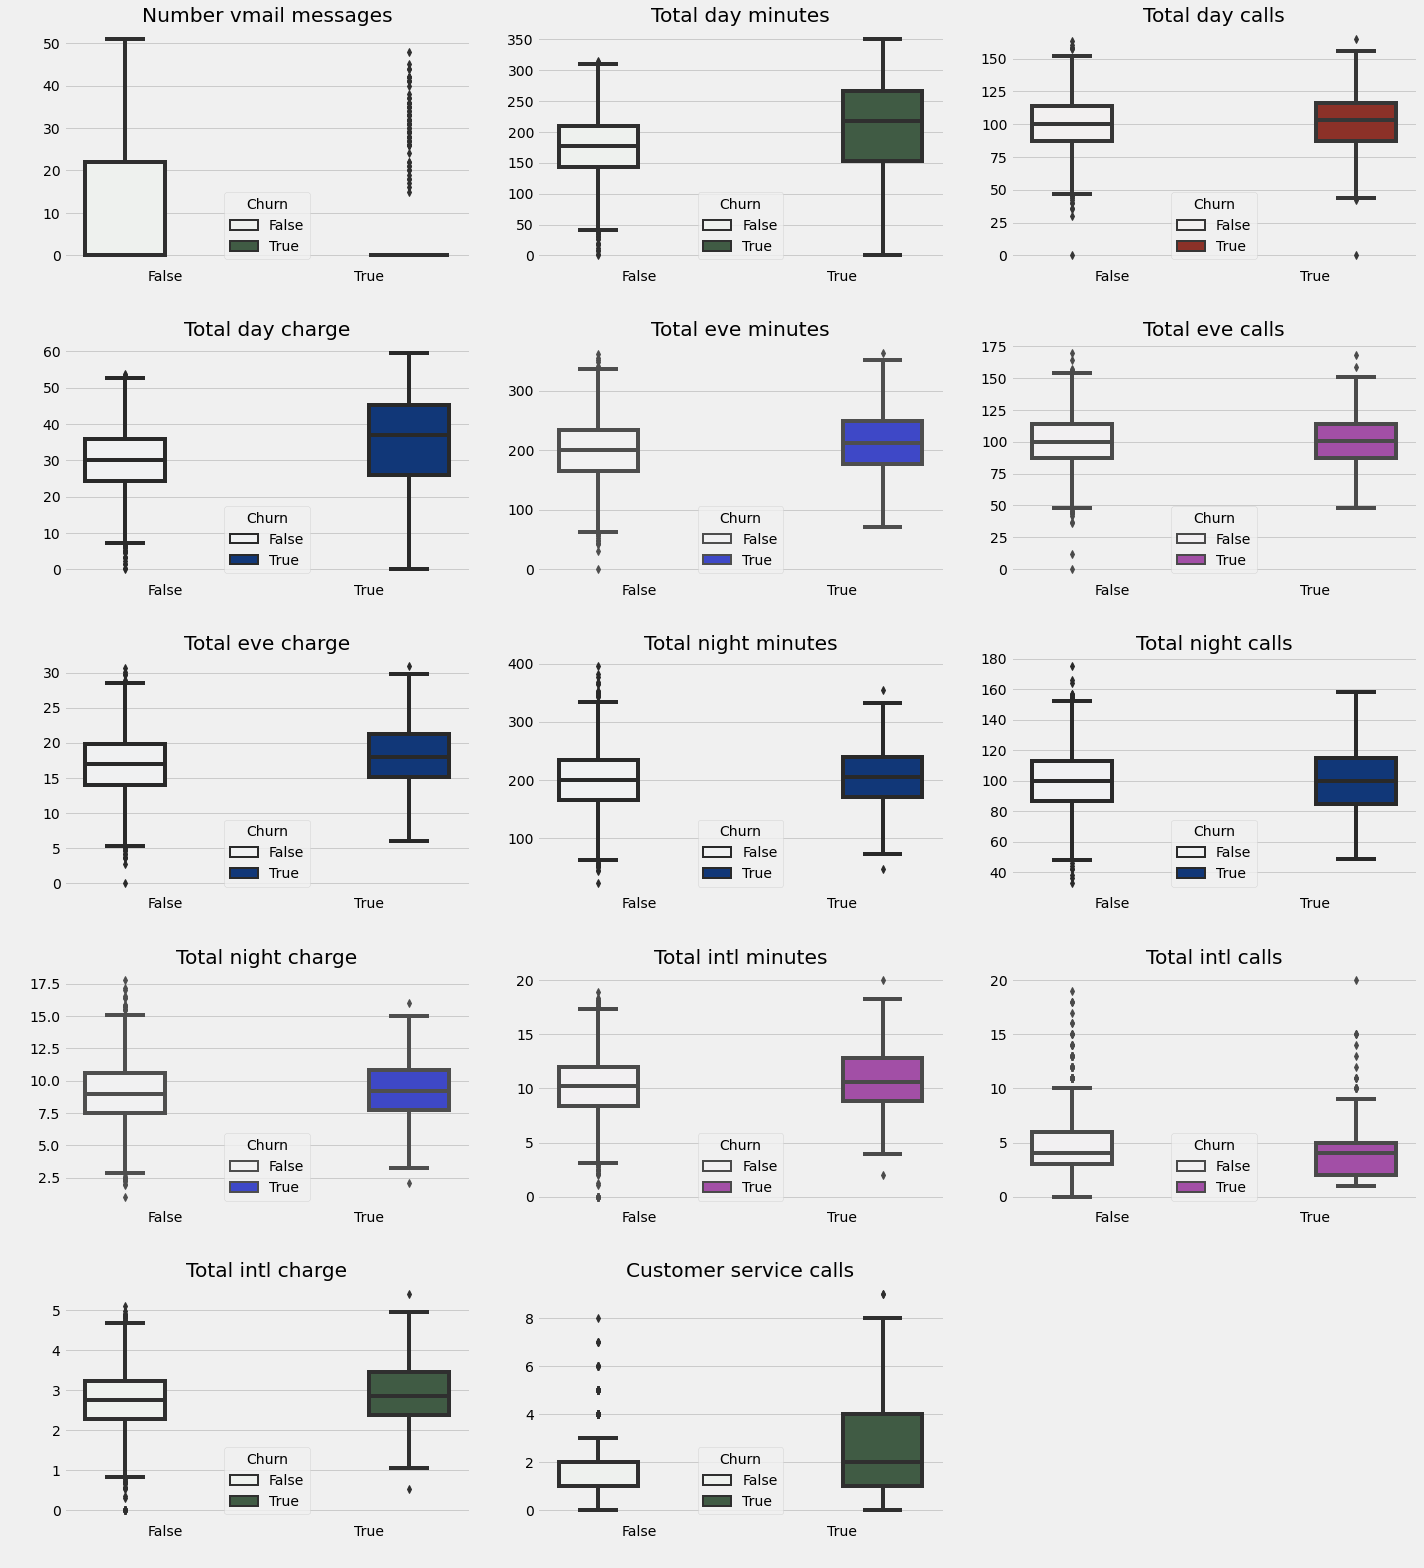

In [ ]:
df = data[['Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls'
       ]]

plt.style.use("fivethirtyeight")
plt.figure(figsize= (20,22))
color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
for i,col in enumerate(df.columns):
  if col in df.columns:
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(5,3, i+1)
    sns.boxplot(data=data,x = 'Churn',y=col, hue ='Churn', color = rand_col)
    plt.title(col, color = 'black')
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout()

**Inference**
Most of the plot have similar box plot result, but we notice different inter-quantile range for "Total day minutes","Total day charges","Total intl calls" and "Customer service calls".

**Correlation values**

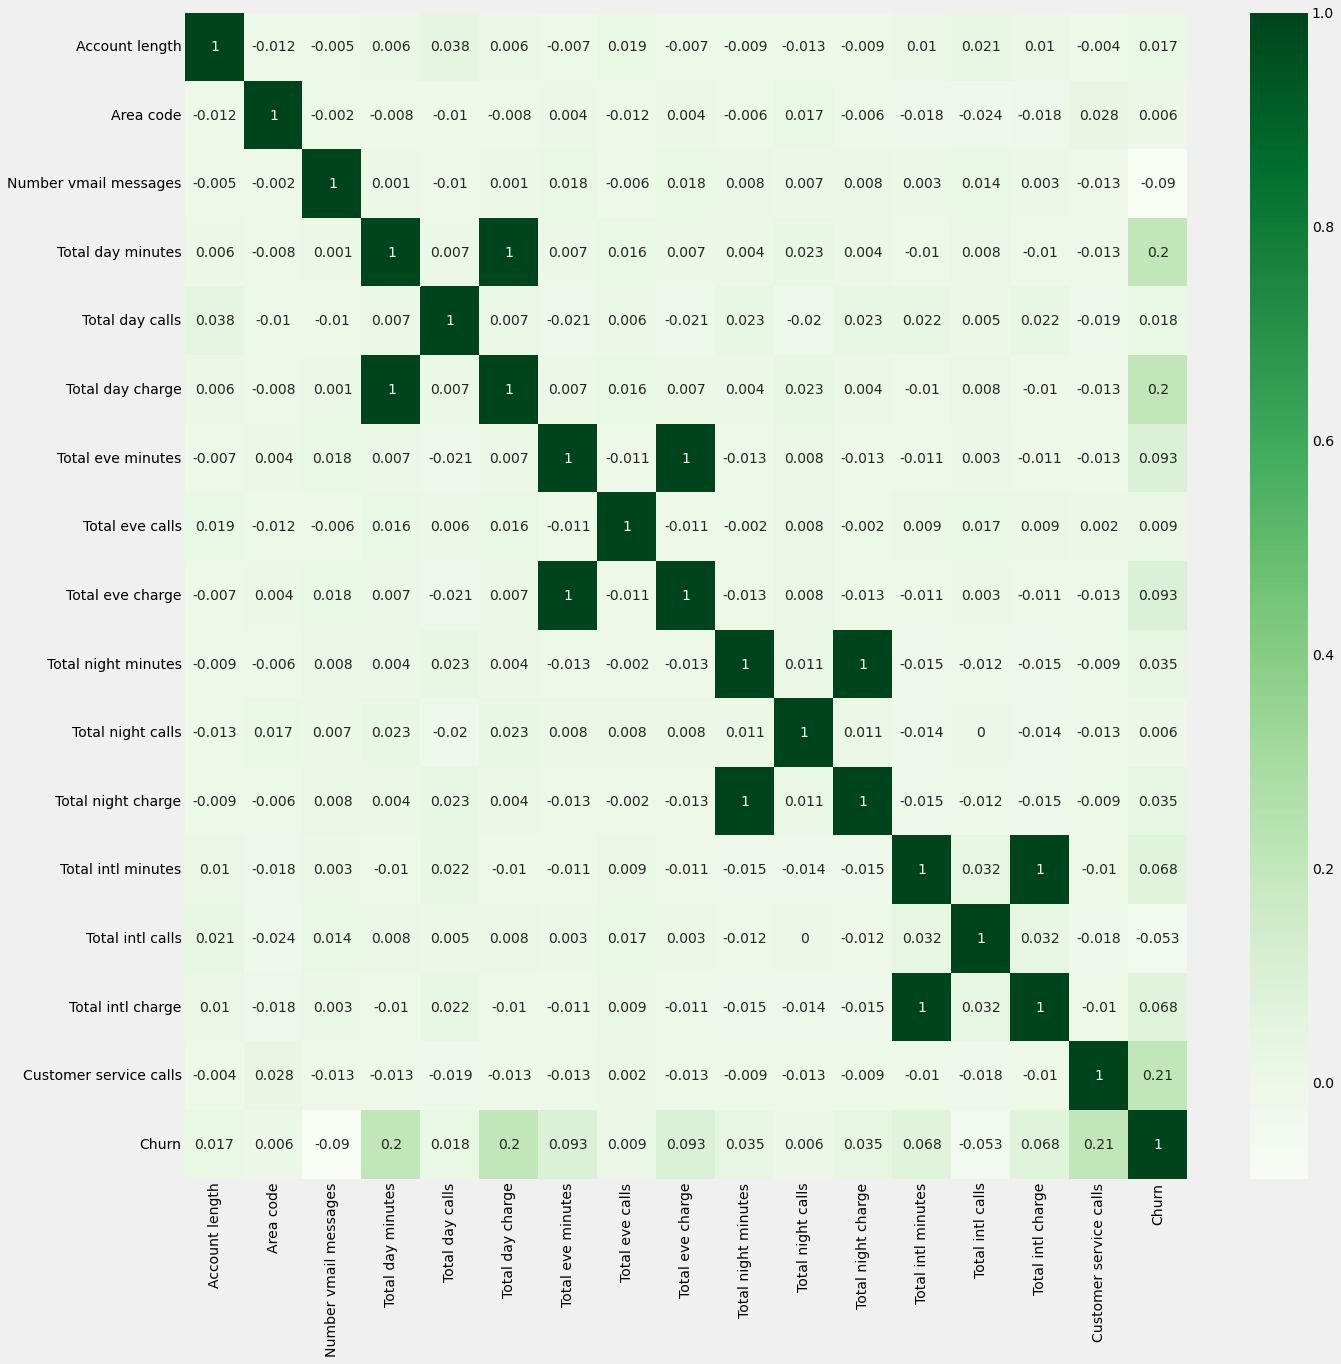

In [ ]:
corr = round(data.corr(),3)
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap="Greens",annot=True)

**Inference**
<br> -From correlation heatmap it can be seen that the correlation value of  "Total day minutes","Total day charges","Customer service calls" have higher value comparatively.
<br> - "Number Vmail messages" and "Total intl calls" only have negative correlation.
<br>- Total day minutes and Total day charge, Total night minutes and Total night charge, Total intl minutes and Total intl charge are highly correlated with each other have correlation coeffecient value equals to 1.

**Questions based on numerical features**
<br> question 4) From boxplots and correlation matrix the above "Total day minutes","Total day charges","Customer service calls" numerical features seems important so lets go deep into that.

observe the difference in the mean , inter quantile range of the churn or not churn value of the above mentioned features

In [ ]:
def describe_with_boxplot(data, col1):
  sns.boxplot(data=data, x = "Churn", y = data[col1], hue = "Churn")
  c_s_c_churn = data[col1][data['Churn']==True]
  c_s_c_not = data[col1][data['Churn']==False]
  print("describe with churn = True")
  print(c_s_c_churn.describe())
  print("-"*50)
  print("describe with churn = False")
  print(c_s_c_not.describe())

  

**Total day minutes**

describe with churn = True
count    483.000000
mean     206.914079
std       68.997792
min        0.000000
25%      153.250000
50%      217.600000
75%      265.950000
max      350.800000
Name: Total day minutes, dtype: float64
--------------------------------------------------
describe with churn = False
count    2850.000000
mean      175.175754
std        50.181655
min         0.000000
25%       142.825000
50%       177.200000
75%       210.300000
max       315.600000
Name: Total day minutes, dtype: float64


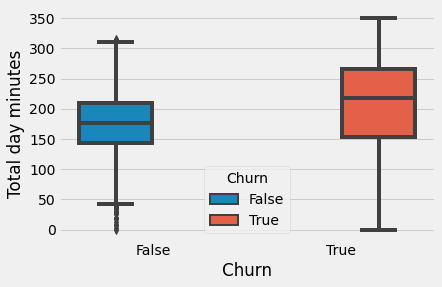

In [ ]:
describe_with_boxplot(data,'Total day minutes')

**Inference**
<br> The median value for customer who churn is 217,and who do not churn is 177.
<br> The total day minutes cunsumption value is higher for person who churns. 

**Total day charge**

describe with churn = True
count    483.000000
mean      35.175921
std       11.729710
min        0.000000
25%       26.055000
50%       36.990000
75%       45.210000
max       59.640000
Name: Total day charge, dtype: float64
--------------------------------------------------
describe with churn = False
count    2850.000000
mean       29.780421
std         8.530835
min         0.000000
25%        24.282500
50%        30.120000
75%        35.750000
max        53.650000
Name: Total day charge, dtype: float64


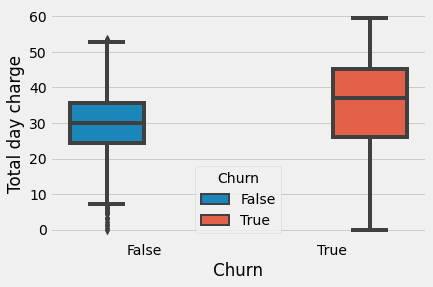

In [ ]:
describe_with_boxplot(data,"Total day charge")

**Inference**
<br> The median value for customer who churn is 36,and who do not churn is 30 i.e. higher for person who churn.

**Number vmail messages**

describe with churn = True
count    483.000000
mean       5.115942
std       11.860138
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       48.000000
Name: Number vmail messages, dtype: float64
--------------------------------------------------
describe with churn = False
count    2850.000000
mean        8.604561
std        13.913125
min         0.000000
25%         0.000000
50%         0.000000
75%        22.000000
max        51.000000
Name: Number vmail messages, dtype: float64


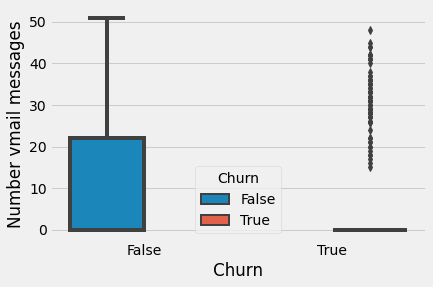

In [ ]:
describe_with_boxplot(data,"Number vmail messages")

**Inference**
<br> more than 75% of people who churn have 0 vmail messages.

**Customer service calls**

describe with churn = True
count    483.000000
mean       2.229814
std        1.853275
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        9.000000
Name: Customer service calls, dtype: float64
--------------------------------------------------
describe with churn = False
count    2850.000000
mean        1.449825
std         1.163883
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: Customer service calls, dtype: float64


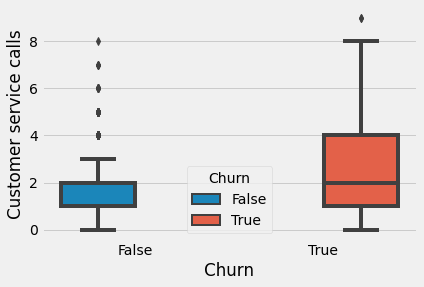

In [ ]:
describe_with_boxplot(data,"Customer service calls")

**Inference**
<br>  Approximately 25% of customer who churns make calls to customer service more than 4 times but who does not churn only 5 people have call more than 4 times.
<br> the mean value is approximately twice than who does not churn. 

question 5)Lets perform the bivariate analysis on features whose correlation value is 1 and see its support the correlation value or not.

In [ ]:
def bivariate_plot(data, col1, col2):
  plt.plot(data[col1],data[col2],'r')
  plt.scatter(data[col1],data[col2])
  plt.xlabel(col1)
  plt.ylabel(col2)
  plt.legend()
  plt.show()


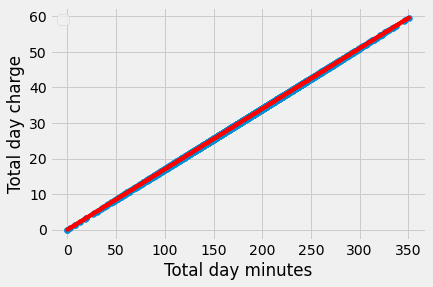

In [ ]:
bivariate_plot(data,'Total day minutes','Total day charge')

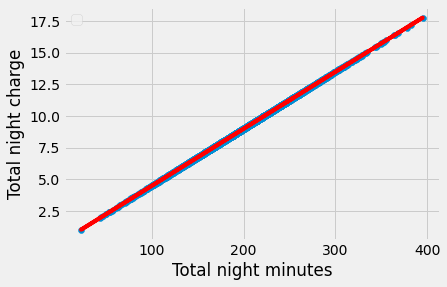

In [ ]:
bivariate_plot(data,'Total night minutes','Total night charge')

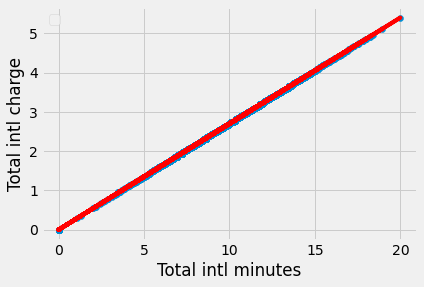

In [ ]:
bivariate_plot(data,'Total intl minutes','Total intl charge')

**Inference**
The bivariate plot supports the correlation value between the above features.

**Conclusion**
<br> **Catogorical feature**
<br> 1) Churn rate of company is 14.49%.
<br> 2) catogories having churn rate higher than company churn rate are Area code (510, 408) ,customer having no voice mail plan activated.
<br> 3) out of 51, 21 states have churn rate higher than the company churn rate.
<br> 4) Customer having international plan have the highest churn rate among all the category explored which is 42.41 %.
<br> **Numerical features**
<br> 5) Total day minutes and Total day charges of person who churns are higher than who do not churn.
<br> 6) more than 75% of people who churn have 0 vmail messages, Infact very few of them have vmail messages more than 0.
<br> 7) Approximately 25% of people who churns calls customer service more than 4 times but only 5 people from the people who do not churn makes customer service calls more than 4 times. Also the mean value of customer service calls by people who churn is approximately twice than people who do not churn.
<br> 8) Total day minutes and Total day charge, Total night minutes and Total night charge, Total intl minutes and Total intl charge are highly correlated with each other have correlation coeffecient value equals to 1 and there plot is linear. so they are directly proportional to each other.
